In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visulaization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/data.csv')
df

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647
...,...,...,...,...
195,0.255081,-0.231497,-0.239632,38.067836
196,0.276068,-0.648411,-0.077441,12.812755
197,0.122250,-1.157383,0.765721,70.454115
198,-0.914822,-0.897140,-0.784205,-93.235783


# Assumption of Linear Regression

###  Linearity

    How Independent and Dependent variable is linearly associated with each other.

    Measure:
    
        Correlation : Pearson'r
        Covariance
        ScatterPlot
        RegPlot

In [3]:
from scipy.stats import pearsonr

correlation_df = pd.DataFrame(columns = ['Feature', 'Correlation', 'P-Value', 'Significance'])

X = df.drop('target', axis = 1)
y = df['target']

for feature in X.columns:
    # Calculate the Pearson correlation coefficient and its p-value
    correlation, p_value = pearsonr(X[feature], df['target'])

    # Determine whether to accept or reject the linearity assumption based on correlation and p-value
    if p_value < 0.05:#abs(correlation) >= 0.5 and p_value < 0.05
        acceptance_status = 'Accept'
    else:
        acceptance_status = 'Reject'

    # Append the results to the correlation DataFrame
    correlation_df = correlation_df.append({'Feature': feature, 'Correlation': correlation, 'P-Value': p_value, 'Significance': acceptance_status}, ignore_index=True)

# Display the correlation DataFrame
print(correlation_df)

    Feature  Correlation       P-Value Significance
0  feature1     0.818926  1.225447e-49       Accept
1  feature2     0.031267  6.602819e-01       Reject
2  feature3     0.578142  3.124074e-19       Accept


### Normality
    Response variable should be N.D with mean µ and variance σ2

    Residual N.D with mean µ = 0 and variance σ2

        1. displot
        2. kdeplot
        3. Andreson darling test
        4. Shapiro-Wilk Test

<Figure size 600x500 with 0 Axes>

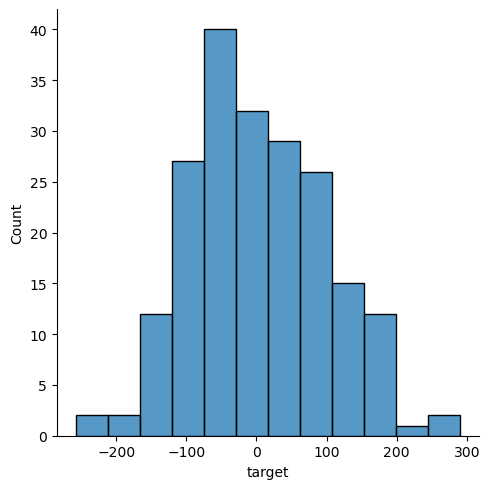

In [4]:
plt.figure(figsize = (6,5))
sns.displot(df['target'])
plt.show()

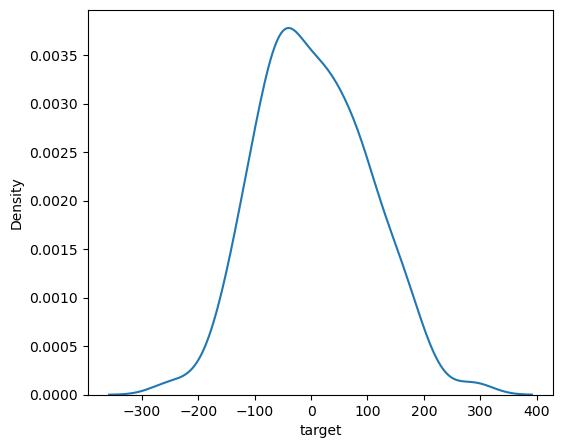

In [5]:
plt.figure(figsize = (6,5))
sns.kdeplot(df['target'])
plt.show()

    Anderson-Darling test statistic for normality
        Ho: The data follows a normal distribution.
        
        In this test, 
            if statistical value > critical value at a given significance level, you reject the null hypothesis (Ho).
            meaning : Data is not normally distributed!

In [6]:
from scipy.stats import anderson

anderson_stat, anderson_critical_values, anderson_significance_levels = anderson(df['target'])
print(f"Anderson-Darling Test\n")
print(f"Statistic: {anderson_stat}")
print(f"Anderson_Critical_Values : {anderson_critical_values}")
print("Anderson_Significance_Levels:", anderson_significance_levels)

# Perform the Anderson-Darling test
for crit_val, sig_level in zip(anderson_critical_values, anderson_significance_levels):
    if anderson_stat > crit_val:
        print(f"At {sig_level}% significance level : Data not normally distributed")
    else:
        print(f"At {sig_level}% significance level : Data normally distributed")

Anderson-Darling Test

Statistic: 0.5444064933784034
Anderson_Critical_Values : [0.565 0.644 0.772 0.901 1.071]
Anderson_Significance_Levels: [15.  10.   5.   2.5  1. ]
At 15.0% significance level : Data normally distributed
At 10.0% significance level : Data normally distributed
At 5.0% significance level : Data normally distributed
At 2.5% significance level : Data normally distributed
At 1.0% significance level : Data normally distributed


    Shapiro-Wilk Test statistic for normality
        Ho: The data follows a normal distribution.
    
    In this test, 
        if P_VALUE < significance level, you reject the null hypothesis (Ho).
        meaning : Data is not normally distributed!

In [7]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test on the 'target' column of your DataFrame
shapiro_stat, shapiro_p_value = shapiro(df['target'])

# Print the results of the Shapiro-Wilk test
print(f"Shapiro-Wilk Test:")
print(f"Statistic: {shapiro_stat}")
print(f"P-Value: {shapiro_p_value}")

# Check if the p-value is less than 0.05 (common significance level)
if shapiro_p_value < 0.05:
    print("The data does not follow a normal distribution (reject null hypothesis).")
else:
    print("The data follows a normal distribution (fail to reject null hypothesis).")

Shapiro-Wilk Test:
Statistic: 0.991992175579071
P-Value: 0.34119105339050293
The data follows a normal distribution (fail to reject null hypothesis).


### Multicollinearity
    There should no correlation among independent variable. If we have multicollinearity then we get false significance.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Independent Variable
X = df.drop('target', axis = 1)

x1_vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_df = pd.DataFrame({'Variable': (X.columns), 'VIF': x1_vif})
vif_df

,Variable,VIF
0,feature1,1.002545
1,feature2,1.003410
2,feature3,1.005937


### Homoscedasticiy

### No Autocorrelation

# Build a model

In [9]:
import statsmodels.api as sm

vif_col = list(vif_df.Variable)

X1 = df[vif_col]
y1 = df['target']

model1 = sm.OLS(y1,X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              1602.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):                   4.72e-138
Time:                        07:43:18   Log-Likelihood:                         -875.50
No. Observations:                 200   AIC:                                      1757.
Df Residuals:                     197   BIC:                                      1767.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feature1      73.9983      1.323     55.930      0.000      71.389      76.607
feature2      -0.0525      1.302     -0.040      0.968      -2.621       2.516
feature3      53.8460      1.416     38.039      0.000      51.054      56.638
==============================================================================
Omnibus:                        1.799   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.454
Skew:                           0.116   Prob(JB):                        0.483
Kurtosis:                       3.348   Cond. No.                         1.12
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X2 = df.drop(['feature2','target'], axis = 1)
#Dependent Variable
y2 = df['target']

model2 = sm.OLS(y2,X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              2415.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):                   8.50e-140
Time:                        07:43:18   Log-Likelihood:                         -875.50
No. Observations:                 200   AIC:                                      1755.
Df Residuals:                     198   BIC:                                      1762.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feature1      73.9985      1.320     56.073      0.000      71.396      76.601
feature3      53.8426      1.410     38.198      0.000      51.063      56.622
==============================================================================
Omnibus:                        1.788   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.409   Jarque-Bera (JB):                1.444
Skew:                           0.115   Prob(JB):                        0.486
Kurtosis:                       3.347   Cond. No.                         1.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
X = df.drop('target', axis = 1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

ytest_predicted = linear_model.predict(X_test)

from sklearn.metrics import r2_score

ytrain_predicted = linear_model.predict(X_train)
train_accuracy = r2_score(y_train, ytrain_predicted)

test_accuracy = r2_score(y_test, ytest_predicted)

print(f"train_accuracy = {train_accuracy}")
print(f"test_accuracy = {test_accuracy}")

train_accuracy = 0.9620692189112015
test_accuracy = 0.9441316426714628
